Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [1]:
%matplotlib inline

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

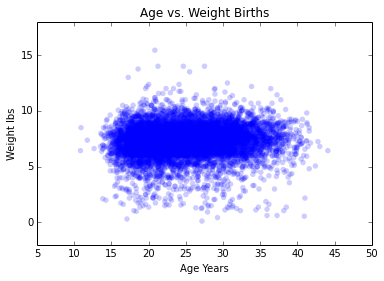

In [4]:
# Import and preset data
import nsfg
import math
import thinkstats2
import thinkplot
import numpy as np
import pandas

df = nsfg.ReadFemPreg()
preg = nsfg.ReadFemPreg()
weight = preg.totalwgt_lb
age = preg.agepreg

# Plot using thinkplot's scatter
thinkplot.Scatter(age, weight)
thinkplot.Show(title='Age vs. Weight Births',
              xlabel='Age Years',
              ylabel='Weight lbs',
              axis=[5,50,-2,18])


       Age vs Weight Percentile Plot


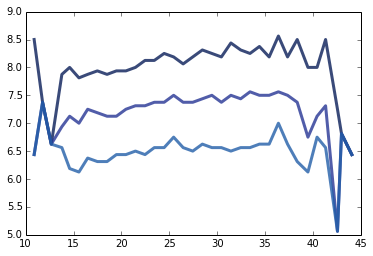

In [5]:
# Creating the Percentile Plot
df = df.dropna(subset=['agepreg','totalwgt_lb'])
bins = np.arange(5, 50, 1)
indices = np.digitize(df.agepreg,bins)
groups = df.groupby(indices)

mean_ages = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]

print "       Age vs Weight Percentile Plot"

for percent in [75,50,25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(mean_ages, weights, label=label)

In [23]:
#Pearson Correlation

def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    
    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    
    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov


def Corr(xs, ys):
        
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    
    meanx, varx = np.mean(xs), np.var(xs)
    meany, vary = np.mean(ys), np.var(ys)
    
    
    corr = Cov(xs, ys, meanx, meany) / math.sqrt(varx * vary)
    return corr

weight = preg.totalwgt_lb
age = preg.agepreg

#weight = weight.dropna()
#age = age.dropna()

weight_list = []
age_list = []

for count in range(0,13592):
    if math.isnan(weight[count]) is False:
        if math.isnan(age[count]) is False:
            weight_list += [weight[count]]
            age_list += [age[count]]

Corr(age_list, weight_list)

0.06884659627091326

The Pearson Correlation value is 0.0688, indicating a 7% correlation in the positive direction. The magnitude is very weak, indicating not a strong correlation.

In [24]:
#Spearman's Correlation

def SpearmanCorr(xs, ys):
    xranks = pandas.Series(xs).rank()
    yranks = pandas.Series(ys).rank()
    return Corr(xranks, yranks)

SpearmanCorr(age_list, weight_list)

0.094623621559440027

The spearman correlation is 0.095, which is higher than the Pearson Correlation. The greater Spearman correlation value indicates that the correlation may not be strictly linear, and there may be outliars and skew messing with the pearson correlation.

Overall, from the data I could somewhat gather, I believe that there is no correlation whatsoever between age when giving birth and birth weight. The graphs show that the weights are linear throughout the age overall, and the percentile graphs are random.